## Chapter 3: a Tour of Machine Learning Classifiers ala Scikit-learn

### First steps with scikit-learn

#### Loading in Iris Dataset

We start by loading in the iris dataset, which is available via scikit-learn:

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# selecting out the 2nd and 3rd attributes, 'petal length' and 'petal width'
X = iris.data[:, [2, 3]]
y = iris.target

Note that we are workign with just 2 features so we can continue to visualize in 2-d and also that the target values are already in integer format; 0, 1, 2 correspond to Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

In [2]:
np.unique(y)

array([0, 1, 2])

#### Splitting data set into training and test datasets

There will be more on this later in the book, but let's split up the dataset so we can cross validate.

In [4]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Let's also apply basic feature scaling 

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

And we can apply the built in version of the perceptron algorithm we authored in Chapter 2.

In [23]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.01, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


It's interesting that when evaluating on unseen data we miss some points in the test set; in chapter 2 we were merely observing that we ultimately are able to fit all of the training data. Let's verify that the skikit-learn ppn also fully fits the training data: 

In [27]:
y_train_predict = ppn.predict(X_train_std)
print('Misclassified samples: %d' % (y_train != y_train_predict).sum())
print('Accuracy on training data: %.2f' % accuracy_score(
        y_train, 
        y_train_predict))

Misclassified samples: 10
Accuracy on training data: 0.90


Huh, I guess the scikit-learn perceptron is more careful not to overfit when training? Why else would it not have fit the training data 100%?

After reading ahead, it turns out we're looking at a larger sample of data that include 3 classes of flower and cannot be linearly separated. See below for the deets.

Now let's plot the decision regions. This version is improved from chapter 2

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [33]:
# %load decision_region_plot.py
"""
Helper function for plotting decision regions from Chapter 3 of Python Machine Learning.

It's improved on the Chapter 3 version in that it can plot the test vs training set differently.
"""

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
        X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
        warnings.warn('Please update to NumPy 1.9.0 or newer')
    else:
        X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')


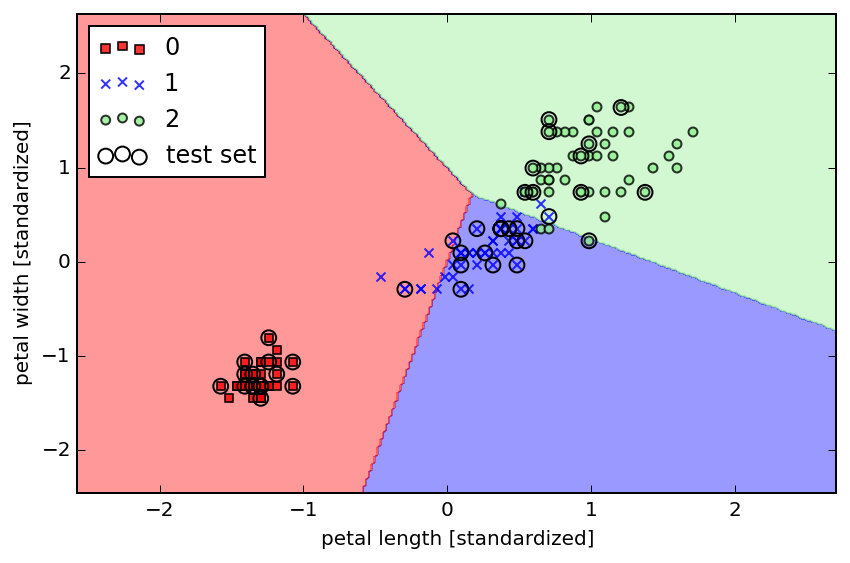

In [34]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

### Logistic regression

Let's explore logistic regression, one of the most widely used linear classification algorithms and a more realistic choice than the perceptron.

First, let's see what a sigmoid function looks like, as it is what's used for the activation function in linear regresion.

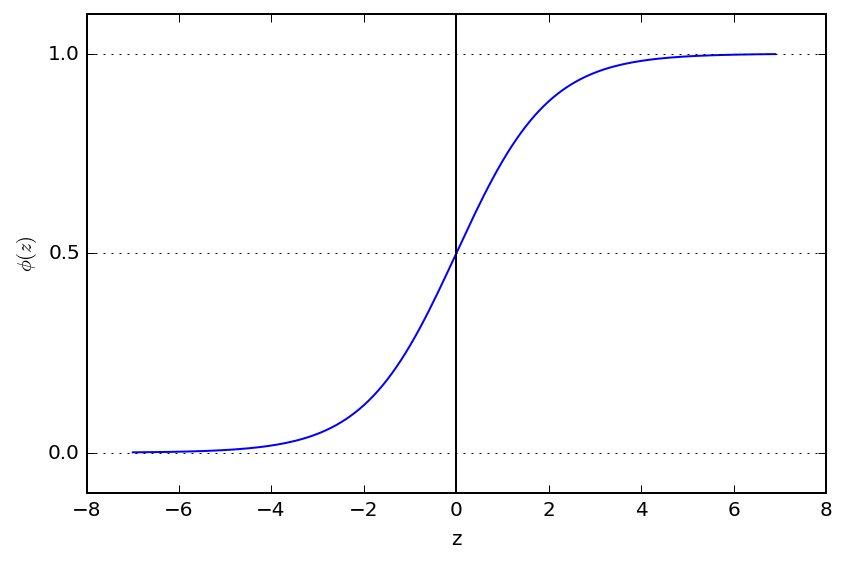

In [36]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()